### Linear Regression ###

Why learn linear regression?
- usually the first tool that most people use
- easy to use-- no tuning (instead of having to decide k for KNN)

Evaluation metric: numerical measure



**Libraries**
- Statsmodels: stats in Python
    - we won't use this outside of class
    - but it's useful for teaching demos
- scikit-learn: machine learning in Python

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# the viz imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data in Dataframe
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- What's observation? represents a single market (1-200, not labeled)
- What are the features? tv, radio, newspaper
   - Advertising money spent on XX for a single product in thousands of dollars
- What is outcome/response? Sales of a single product in a given market (in widgets, not money)

**Questions about the Data**

How should we spend our advertising money in the future?

Can we make this more specific?
1. Relationship between ads and sales? [something that the question above assumes]
2. How strong?
3. Which ad types contribute to sales?
4. What is the effect of each ad type on sales?
5. Given ad spending in a specific market, can sales be predicted?

**Before you model, visualize!!**

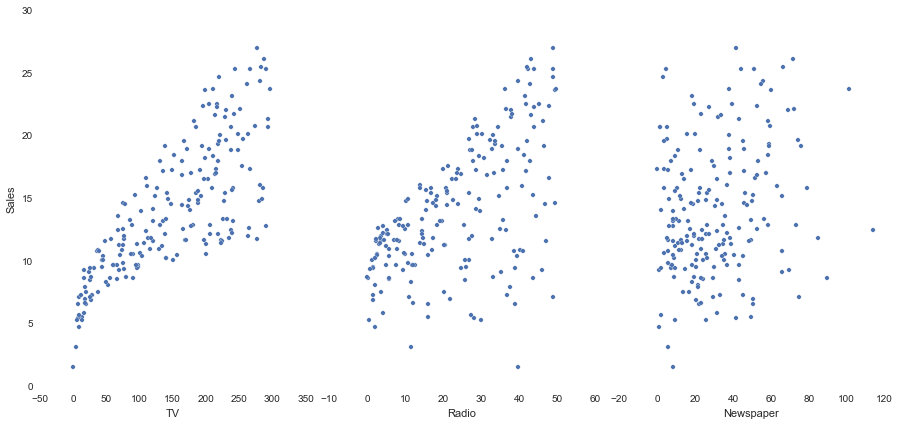

In [3]:
# scatter plot in Seaborn
# pair plot will plot them all at once
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7)

Plots observations (each graph should have 200 dots)
- TV and Radio seem to have stronger relationship than Newspaper

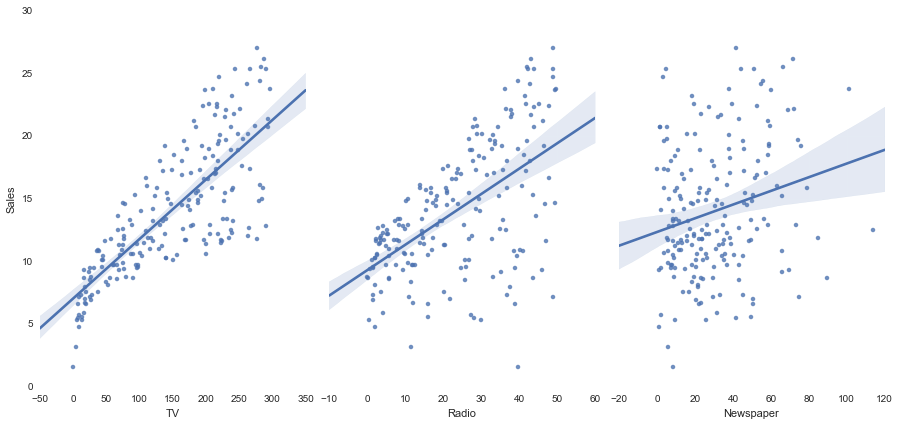

In [4]:
# include a "regression line"
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg')

Automatically includes regression lines that fits general trend of data
- Shading around regression line?

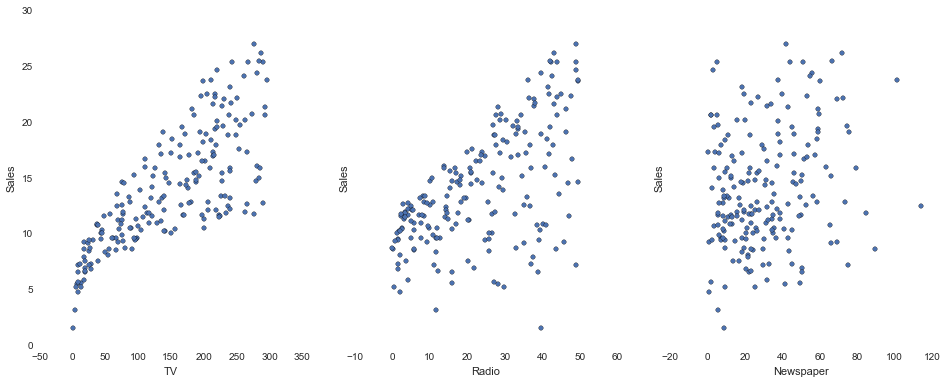

In [5]:
# scatter plot in Pandas... easier to use seaborn
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 6))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

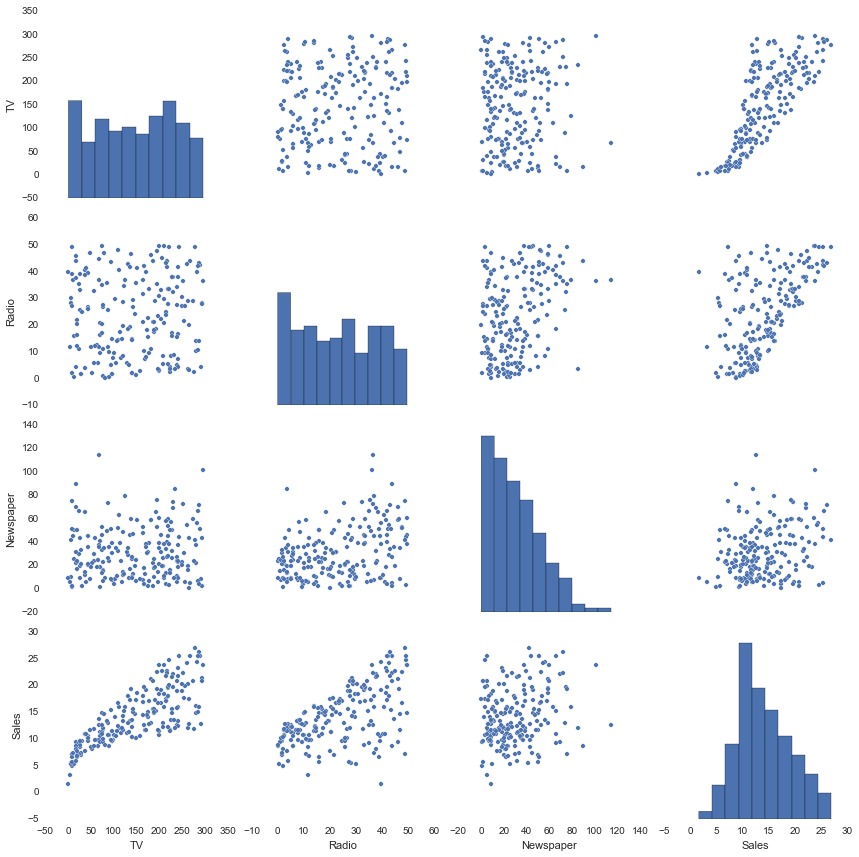

In [6]:
# using a scatter matrix
sns.pairplot(data)

Cool way to viz a lot of features, but start with small number of variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CD99320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C8E59B0>]], dtype=object)

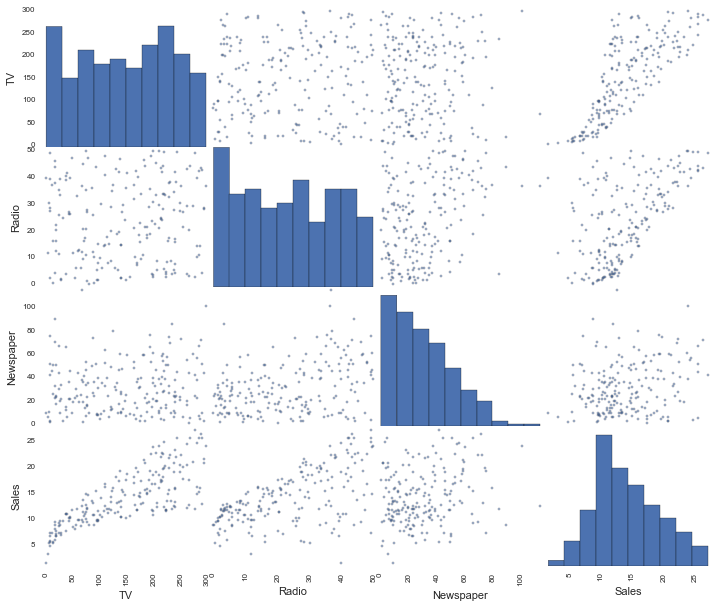

In [7]:
# scatter matrix in Pandas
pd.scatter_matrix(data, figsize=(12,10))

In [8]:
# pandas computing correlation matrix to see numerical values
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


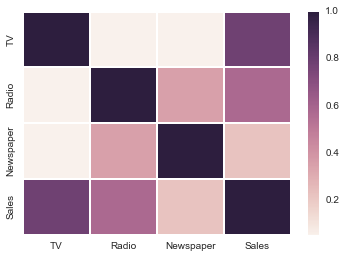

In [9]:
# using the correlation matrix from pandas to create a heatmap in seaborn
sns.heatmap(data.corr())

Heatmap requires you to pass just data, not necessarily a correlation matrix
Will set the range appropriate to the range of values in the data (in this case, 0-1 because we're looking at correlation matrix)

Strongest association with TV and sales

###Simple Linear Regression###

$y = b0 + b1x$

- y = response
- x = feature

b0 and b1 = model coefficients, what we have to calc based on data

**Estimating model coefficients**

- model fitting: least squares criterion
    - creating the square line
    - xxx.fit() <-- fitting the model to the data
- need to find the line that minimizes sum of squared error (SSE)

In [10]:
## stat modeling ##

# creating the fitted model
lm = smf.ols(formula = 'Sales ~ TV', data=data).fit()
# response ~ (given) features
# define the data (data = data)

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [11]:
## scikit-learn ##

# create X and y
feature_cols = ['TV']
X = data[feature_cols] # still a dataframe
y = data.Sales

# instantiate and fit
linreg = LinearRegression() #something we previously imported
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_ #underscore needed, scikit-learn convention
# if something is learned, it adds the _
# can't look it up until you've fitted the model
print linreg.coef_


7.03259354913
[ 0.04753664]


*Interpretation*

- A "unit" increase in TV ad spending is associated with a 0.0475 "unit" increase in Sales
- A thousand dollars spent will result in increase in 47.5 widgets
- NOT CAUSATION.

*Using above model*

What happens when TV advertising increased by 50K?

In [13]:
## using stats model

# you have to create a dataframe since Statsmodels expects a datafram
X_new = pd.DataFrame({'TV':[50]})

# predict
lm.predict(X_new)

array([ 9.40942557])

In [14]:
## using scikit learn

linreg.predict(50)

array([ 9.40942557])

*Does scale of features matter?*

- It did for KNN
- what happens if TV was in dollars rather than thousands?

In [15]:
# creating a new feature (series) in pandas
data['TV_dollars'] = data.TV * 1000 # it knows if it's supposed to go through the entire column

# scikit-learn

# creating X and y
feature_cols = ['TV_dollars']
X = data[feature_cols]
y = data.Sales

linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_


7.03259354913
[  4.75366404e-05]


Scale is irrelevant! Only affects scale of coefficient, and we just change our interpretation
- A thousand dollars spent will result in increase in 47.5 widgets

### Bias and Variance ###

Linear regression is:
- low variance
- high bias

The line stays roughly the same place, if there is repeated sampling from the underlying population
- Consider that model is based on a measure of variance

### Confidence Intervals ###

95% confidence interval: if the population from which the sample was drawn was sampled 100 times, approximately 95% of those confidence intervals would contain the true coefficient
- Does not mean that a given interval is 95% likely to correct

In [16]:
## CI in statsmodel

lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


(assuming normal dist)

The 95% CI for the Intercept (beta 0) is [6.13, 7.94]

The 95% CI for the slope (beta 1) is [0.04, 0.05]

### Hypothesis testing and p-values ###

p values not accessible from sci-kit learn?

In [19]:
## using stats model

lm.pvalues

# more useful
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 Jul 2015   Prob (F-statistic):           1.47e-42
Time:                        19:52:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###How well does the model fit the data?###

**R-Squared**

- Common way to evaluate overall fit of linear model --> not whether or not you should include a feature
- Proportion of variance in the observed data that is explained by the model
- (1 - R^2) = proportion of variance in the observed data that cannot be explained by the model
- Reduction in error over the **null model**
    - Null model where b1 = 0

In [20]:
# stats model

lm.rsquared

0.61187505085007099

In [22]:
# scikit - learn
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.61187505085007099

- r^2 could overfit since it's comparing to the training data
- useful for comparing models, rather than evaluating models
- p-value and r^2 are two different measures
    - p-value: how well does your model explain the relationship
    - r^2: how well does your model explain variances in data

### Multiple Linear Regression ###

In [23]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [24]:
# pair the feature names with the coefficients
# outputting tuples
# making it into a dictionary makes it useful if you want a look-up structure
zip(feature_cols, linreg.coef_)

[('TV', 0.045764645455397622),
 ('Radio', 0.18853001691820459),
 ('Newspaper', -0.0010374930424762244)]

All of the slopes above assume the other two variables are fixed amount

Why does Newspaper have a negative slope even though we saw in the graphs above that it's a positive relationship with sales?
- Newspaper and Radio have a correlation

### Feature Selection

How do I decide which features to include in a linear model?

*Using p-values*

In [25]:
### STATSMODELS ###

# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the p-values for the model coefficients
print lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


These p-values indicate we should reject the null hypothesis for TV and Radio but fail to reject for Newspaper.

However, using p-values can have drawbacks:
- linear models rely on assumptions (like features being independent) and if those assumptions are violated (which they are often) p-value is less reliable
- using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant

*Using R-Squared*

In [27]:
# create the fitted model with all three factors
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.89719426108289557

In [28]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.89721063817895219

Adding more terms will always increase r^2, leads to overfitting
- r^2 relies on same assumptions as p-value
- adjusted r-squared is an alternative that penalizes model complexity (to control for overfitting) but under-penalizes complexity

*Using train-test-split (or cross-validation*

Better approach
- attempt to directly estimate how well your model will generalize out-of-sample data
- rely on fewer assumptions
- can be applied to any model, not just linear model

### Evaluation metrics for regression problems###

Accuracy is great for classification, but what about continuous variables?

*Mean Absolute Error: mean of the absolute value of errors*

In [30]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

print metrics.mean_absolute_error(y_true, y_pred)

10.0


*Mean Squared Error: mean of squared errors*

In [34]:
print metrics.mean_squared_error(y_true, y_pred)

150.0


*Root Mean Squared Error: square root of above*

In [35]:
print np.sqrt(metrics.mean_squared_error(y_true, y_pred))

12.2474487139


Comparing the metrics:
- **MAE** is easiest to understand bc it's the avg error
- **MSE** is more popular bc it "punishes" larger errors
- **RSME** is even more popular bc is interpretable in the "y" units

### So let's use train-test-split and compare feature selections###

Use RSME as evaluation  metric

In [36]:
# define a function that accepts X and y and computes RMSE
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    # splits
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) # fits to the training data
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [37]:
# include Newspaper
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
train_test_rmse(X, y)

1.4046514230328946

In [38]:
# exclude Newspaper
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
train_test_rmse(X, y)

1.3879034699382882